<a href="https://colab.research.google.com/github/muhammadiskasujana/Data-Science-Project/blob/main/studi_kasus_pre_processing_dataset_gofood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Mengimport library yang diperlukan***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

***Mengupload dataset GoFood***

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dataset_gofood.csv to dataset_gofood.csv


***Membaca dataset menjadi dataframe***

In [ ]:
df = pd.read_csv("dataset_gofood.csv")

***Menampilkan informasi awal dataset***

In [ ]:
print("Info Dataset Sebelum Preprocessing:")
print(df.info())

Info Dataset Sebelum Preprocessing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45195 entries, 0 to 45194
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   merchant_name   45195 non-null  object 
 1   merchant_area   45195 non-null  object 
 2   category        45195 non-null  object 
 3   display         45195 non-null  object 
 4   product         45195 non-null  object 
 5   price           45195 non-null  float64
 6   discount_price  2738 non-null   float64
 7   isDiscount      45195 non-null  int64  
 8   description     21720 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 3.1+ MB
None


***Mengecek kualitas data***

***Melihat statistik deskriptif untuk kolom-kolom numerik***

In [ ]:
print("\nStatistik Deskriptif:")
print(df.describe())


Statistik Deskriptif:
              price  discount_price    isDiscount
count  4.519500e+04     2738.000000  45195.000000
mean   4.387851e+04    46382.973703      0.060582
std    9.317646e+04    42402.786836      0.238564
min    1.000000e+00     3500.000000      0.000000
25%    1.500000e+04    18000.000000      0.000000
50%    2.400000e+04    33175.000000      0.000000
75%    4.250000e+04    59975.000000      0.000000
max    1.980000e+06   355500.000000      1.000000


***Menangani missing value***

***Menghitung jumlah missing value tiap kolom***

In [ ]:
missing_values = df.isnull().sum()
print("\nJumlah Missing Value per Kolom:")
print(missing_values)


Jumlah Missing Value per Kolom:
merchant_name         0
merchant_area         0
category              0
display               0
product               0
price                 0
discount_price    42457
isDiscount            0
description       23475
dtype: int64


***Impute data untuk mengganti missing value***

***Misalnya dengan menggunakan median untuk kolom numerik***

In [ ]:
median_values = df.median()
df.fillna(median_values, inplace=True)

<ipython-input-7-4ed8717b7563>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  median_values = df.median()


***Mengecek outlier dan cara menanganinya***

***Visualisasi boxplot untuk kolom-kolom numerik***

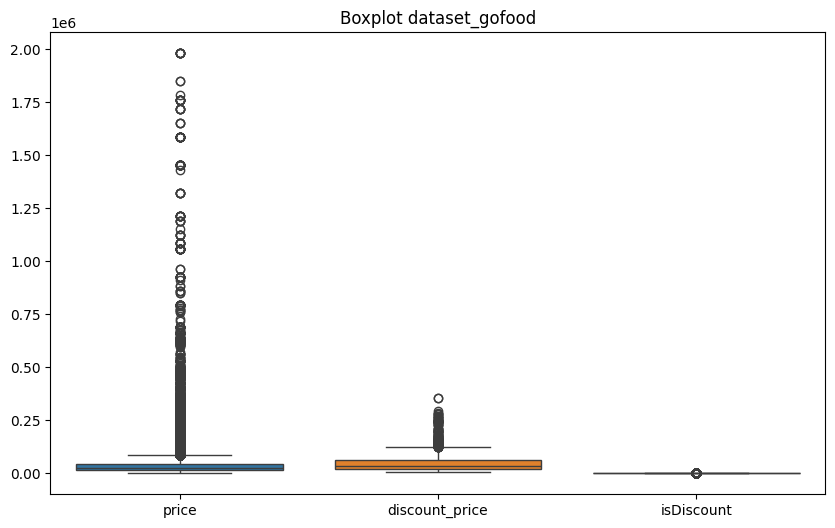

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df)
plt.title('Boxplot dataset_gofood')
plt.show()

***Menangani outlier, misalnya dengan menghapus data yang merupakan outlier***

***Dapat menggunakan Interquartile Range (IQR) atau batasan lainnya***

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_no_outliers = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

<ipython-input-9-35ad810df7bc>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-9-35ad810df7bc>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
<ipython-input-9-35ad810df7bc>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_no_outliers = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


***Mengatasi data duplikat***

***Menghapus data duplikat jika ada***

In [ ]:
df_no_duplicates = df_no_outliers.drop_duplicates()

***Menganalisis data yang sudah clean untuk proses pemodelan machine learning***

***Visualisasi distribusi data***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dataset_gofood.csv to dataset_gofood (1).csv


In [ ]:
df = pd.read_csv("dataset_gofood (1).csv")

In [ ]:
df.head()

,merchant_name,merchant_area,category,display,product,price,discount_price,isDiscount,description
0,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Hot Almara Kopi (kopi Susu Gula Aren),20000.0,NaN,0,Sajian Kopi Susu Gula Aren Yang Berbeda Dari K...
1,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Ice Almara Kopi (kopi Susu Gula Aren),22000.0,NaN,0,Sajian Kopi Susu Gula Aren Yang Berbeda Dari K...
2,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Hot Millsis,20000.0,NaN,0,Sajian Susu Coklat Milo Dengan Racikan Khas 3 ...
3,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Ice Millsis,20000.0,NaN,0,Sajian Susu Coklat Milo Dengan Racikan Khas 3 ...
4,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Hot Millbro,22000.0,NaN,0,Sajian Susu Coklat Milo Plus Espresso Dengan R...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45195 entries, 0 to 45194
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   merchant_name   45195 non-null  object 
 1   merchant_area   45195 non-null  object 
 2   category        45195 non-null  object 
 3   display         45195 non-null  object 
 4   product         45195 non-null  object 
 5   price           45195 non-null  float64
 6   discount_price  2738 non-null   float64
 7   isDiscount      45195 non-null  int64  
 8   description     21720 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 3.1+ MB


In [ ]:
df.isnull().sum()

merchant_name         0
merchant_area         0
category              0
display               0
product               0
price                 0
discount_price    42457
isDiscount            0
description       23475
dtype: int64

In [ ]:
df['discount_price'].fillna(0, inplace=True)
df = df.drop(['description'], 1)

<ipython-input-45-50a11eaeec3a>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(['description'], 1)


In [ ]:
df.head()

,merchant_name,merchant_area,category,display,product,price,discount_price,isDiscount
0,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Hot Almara Kopi (kopi Susu Gula Aren),20000.0,0.0,0
1,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Ice Almara Kopi (kopi Susu Gula Aren),22000.0,0.0,0
2,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Hot Millsis,20000.0,0.0,0
3,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Ice Millsis,20000.0,0.0,0
4,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Hot Millbro,22000.0,0.0,0


In [ ]:
df.isnull().sum()

merchant_name     0
merchant_area     0
category          0
display           0
product           0
price             0
discount_price    0
isDiscount        0
dtype: int64

In [ ]:
df.duplicated(subset='merchant_area').sum()

45192

In [ ]:
df['merchant_area'].value_counts()

medan       15945
surabaya    15222
jakarta     14028
Name: merchant_area, dtype: int64

In [ ]:
df['category'].value_counts()

Roti                                  4308
Jajanan                               1964
Aneka nasi                            1940
Minuman                               1375
Cepat saji                            1092
                                      ... 
Aneka nasi/Bakso & soto/Cepat saji       8
Jepang/Cepat saji/Barat                  7
Jajanan/Cepat saji/Chinese               6
Barat/Jajanan/Ayam & bebek               4
Cepat saji/Aneka nasi/Chinese            3
Name: category, Length: 333, dtype: int64

In [ ]:
df['display'].value_counts()

Minuman                                      1770
Makanan                                      1045
Roti                                          887
Snack                                         754
Coffee                                        599
                                             ... 
Paket, 2 Burger Kentang, Sosis, Otak Otak       1
Es Kangen                                       1
Es Markisa Mojito                               1
Es Lycee Tea                                    1
ES KOPI                                         1
Name: display, Length: 2986, dtype: int64

In [ ]:
df.discount = df['isDiscount'] == 0

df.discount.value_counts()

<ipython-input-54-6c24b5da7643>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.discount = df['isDiscount'] == 0


True     42457
False     2738
Name: isDiscount, dtype: int64

In [ ]:
df.dtypes

merchant_name      object
merchant_area      object
category           object
display            object
product            object
price             float64
discount_price    float64
isDiscount          int64
description        object
dtype: object

In [ ]:
kolom_numerik = 'dataset_gofood'

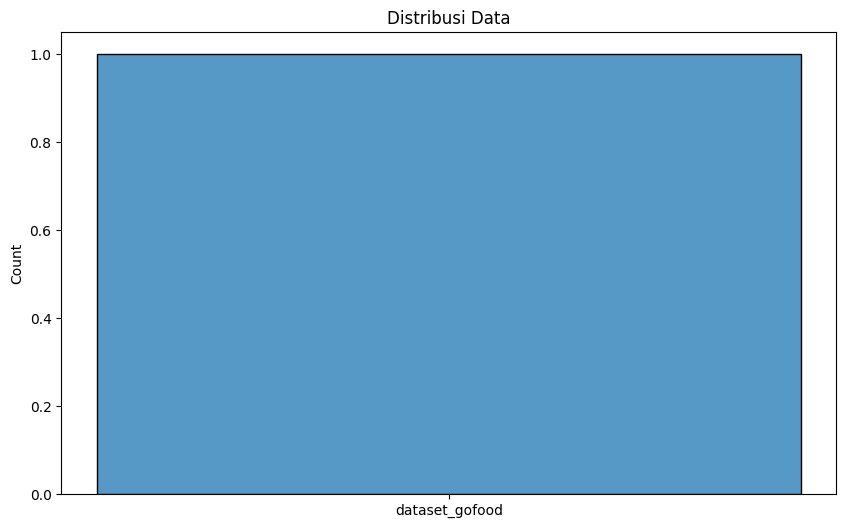

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=[kolom_numerik])
plt.title('Distribusi Data')
plt.show()

***Matriks korelasi***

<ipython-input-46-51424f9c02e0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


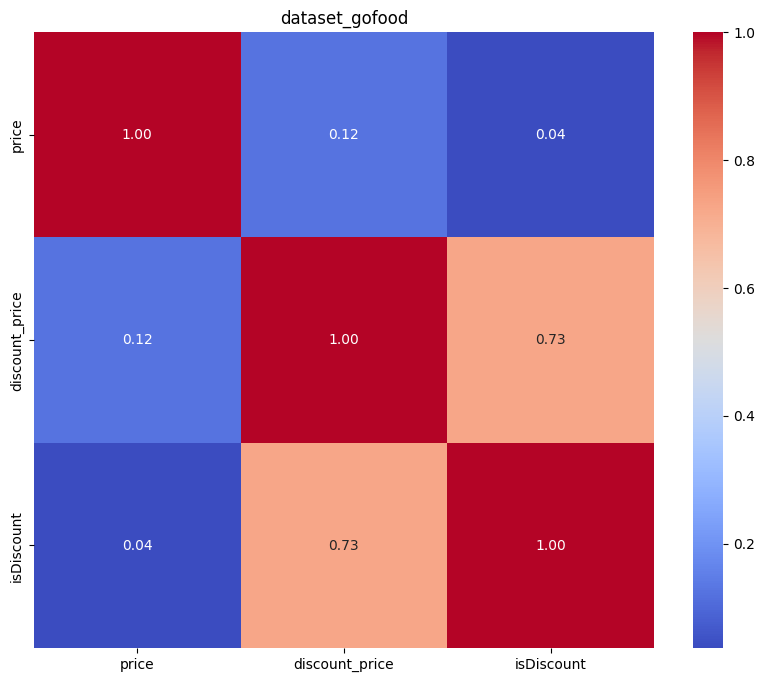

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('dataset_gofood')
plt.show()

In [ ]:
df['discount_price'].value_counts()

0.0         42457
50000.0        58
39000.0        48
100000.0       45
25000.0        45
            ...  
34300.0         1
26200.0         1
56300.0         1
15800.0         1
250000.0        1
Name: discount_price, Length: 554, dtype: int64

In [ ]:
import matplotlib